## Logistic Regression

Full Match

In [53]:
# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [54]:
import pandas as pd
import numpy as np
import scipy
from sklearn.model_selection import train_test_split

In [55]:
data_silver=pd.read_csv("Data_silver.csv")
data_gold=pd.read_csv("Data_gold.csv")
data_plat=pd.read_csv("Data_Plat.csv")
data_diamond=pd.read_csv("Data_diamond.csv")

In [20]:
data=data_silver.append([data_gold,data_plat,data_diamond])
X=np.array(data.values[:,7:],'double')
Y=np.array(data.values[:,1],'double')

In [21]:
where_are_NaNs = np.isnan(X)
X[where_are_NaNs] = 0

Y[Y==100]=1
Y[Y==200]=0

In [22]:
XX, X_TEST, YY, Y_TEST = train_test_split(X, Y, test_size=0.1, random_state=42)

In [23]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
X_scaler=StandardScaler()
X_scaler.fit(XX)
XX_scaled=X_scaler.transform(XX)   
X_TEST_scaled=X_scaler.transform(X_TEST)

In [161]:
## run cross-validation for an K-nearest neighbors on the training data
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest
skf = StratifiedKFold(n_splits=5)
cv_training_auc =[]
cv_test_auc =[]

## cross_validation
k = range(1, 40)

for train_index, test_index in skf.split(XX_scaled,YY):
    X_train, X_test = XX_scaled[train_index], XX_scaled[test_index]
    y_train, y_test = YY[train_index], YY[test_index]
    training_auc = []
    test_auc = []
    for i in k:
        # the model
        feature_selector=SelectKBest(k=i)
        feature_selector.fit(X_train,y_train)
        X_train_subset=feature_selector.transform(X_train)
        clf = LogisticRegression()
        clf.fit(X_train_subset, y_train)
        training_auc_k = []
        test_auc_k = []
        # training
        dec_stat=clf.predict_proba(feature_selector.transform(X_train))[:,1]
        fpr, tpr, _ = roc_curve(y_train,dec_stat,pos_label=1)
        roc_auc = auc(fpr, tpr)
        training_auc_k.append(roc_auc)
        # test
        dec_stat=clf.predict_proba(feature_selector.transform(X_test))[:,1]
        fpr, tpr, _ = roc_curve(y_test,dec_stat,pos_label=1)
        roc_auc = auc(fpr, tpr)
        test_auc_k.append(roc_auc)
        training_auc.append(training_auc_k)
        test_auc.append(test_auc_k)
cv_training_auc.append(training_auc)
cv_test_auc.append(test_auc)

In [167]:
avg_test_auc=np.mean(cv_test_auc,axis=0)

In [173]:
np.argmax(avg_test_auc)  ##six features

5

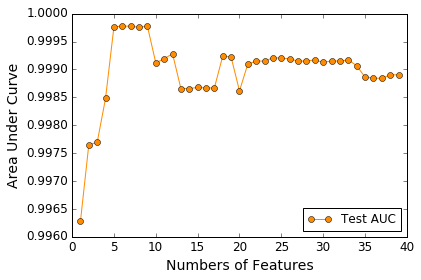

In [171]:
plt.plot(range(1,40),list(avg_test_auc), 'darkorange', label ="Test AUC",marker='o')
plt.xlabel('Numbers of Features')
plt.ylabel('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [175]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
feature_selector=SelectKBest(k=6)
feature_selector.fit(XX_scaled,YY)
X_train_subset=feature_selector.transform(XX_scaled)
clf = LogisticRegression()
clf.fit(X_train_subset, YY)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [178]:
## testing
dec_stat=clf.predict_proba(feature_selector.transform(X_TEST))[:,1]
fpr, tpr, _ = roc_curve(Y_TEST,dec_stat,pos_label=1)
roc_auc = auc(fpr, tpr)

In [179]:
roc_auc

0.99650626235992079

First 10 minutes

In [181]:
XX_10=XX[:,list(range(0,20))+list(range(58,63))]
X_TEST_10=X_TEST[:,list(range(0,20))+list(range(58,63))]

In [182]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
X_scaler=StandardScaler()
X_scaler.fit(XX_10)
XX_scaled_10=X_scaler.transform(XX_10)   
X_TEST_scaled_10=X_scaler.transform(X_TEST_10)

In [184]:
## run cross-validation for an K-nearest neighbors on the training data
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest
skf = StratifiedKFold(n_splits=5)
cv_training_auc =[]
cv_test_auc =[]

## cross_validation
k = range(1, 25)

for train_index, test_index in skf.split(XX_scaled_10,YY):
    X_train, X_test = XX_scaled_10[train_index], XX_scaled_10[test_index]
    y_train, y_test = YY[train_index], YY[test_index]
    training_auc = []
    test_auc = []
    for i in k:
        # the model
        feature_selector=SelectKBest(k=i)
        feature_selector.fit(X_train,y_train)
        X_train_subset=feature_selector.transform(X_train)
        clf = LogisticRegression()
        clf.fit(X_train_subset, y_train)
        training_auc_k = []
        test_auc_k = []
        # training
        dec_stat=clf.predict_proba(feature_selector.transform(X_train))[:,1]
        fpr, tpr, _ = roc_curve(y_train,dec_stat,pos_label=1)
        roc_auc = auc(fpr, tpr)
        training_auc_k.append(roc_auc)
        # test
        dec_stat=clf.predict_proba(feature_selector.transform(X_test))[:,1]
        fpr, tpr, _ = roc_curve(y_test,dec_stat,pos_label=1)
        roc_auc = auc(fpr, tpr)
        test_auc_k.append(roc_auc)
        training_auc.append(training_auc_k)
        test_auc.append(test_auc_k)
cv_training_auc.append(training_auc)
cv_test_auc.append(test_auc)

In [187]:
avg_test_auc=np.mean(cv_test_auc,axis=0)
np.argmax(avg_test_auc) ##19

18

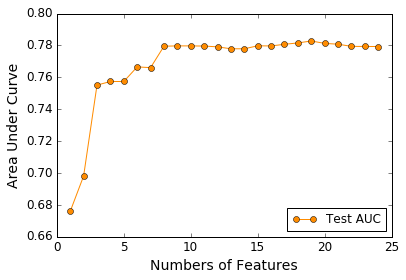

In [188]:
plt.plot(range(1,25),list(avg_test_auc), 'darkorange', label ="Test AUC",marker='o')
plt.xlabel('Numbers of Features')
plt.ylabel('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [189]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
feature_selector=SelectKBest(k=18)
feature_selector.fit(XX_scaled_10,YY)
X_train_subset=feature_selector.transform(XX_scaled_10)
clf = LogisticRegression()
clf.fit(X_train_subset, YY)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [190]:
## testing
## testing
dec_stat=clf.predict_proba(feature_selector.transform(X_TEST_10))[:,1]
fpr, tpr, _ = roc_curve(Y_TEST,dec_stat,pos_label=1)
roc_auc = auc(fpr, tpr)

roc_auc

0.73813447593935377

Prematch Data

In [109]:
XX_prematch=XX[:,58:63]
X_TEST_prematch=X_TEST[:,58:63]

In [192]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
X_scaler=StandardScaler()
X_scaler.fit(XX_prematch)
XX_scaled_prematch=X_scaler.transform(XX_prematch)   
X_TEST_scaled=X_scaler.transform(X_TEST_prematch)

In [194]:
## run cross-validation for an K-nearest neighbors on the training data
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest
skf = StratifiedKFold(n_splits=5)
cv_training_auc =[]
cv_test_auc =[]

## cross_validation
k = range(1, 6)

for train_index, test_index in skf.split(XX_scaled_prematch,YY):
    X_train, X_test = XX_scaled_prematch[train_index], XX_scaled_prematch[test_index]
    y_train, y_test = YY[train_index], YY[test_index]
    training_auc = []
    test_auc = []
    for i in k:
        # the model
        feature_selector=SelectKBest(k=i)
        feature_selector.fit(X_train,y_train)
        X_train_subset=feature_selector.transform(X_train)
        clf = LogisticRegression()
        clf.fit(X_train_subset, y_train)
        training_auc_k = []
        test_auc_k = []
        # training
        dec_stat=clf.predict_proba(feature_selector.transform(X_train))[:,1]
        fpr, tpr, _ = roc_curve(y_train,dec_stat,pos_label=1)
        roc_auc = auc(fpr, tpr)
        training_auc_k.append(roc_auc)
        # test
        dec_stat=clf.predict_proba(feature_selector.transform(X_test))[:,1]
        fpr, tpr, _ = roc_curve(y_test,dec_stat,pos_label=1)
        roc_auc = auc(fpr, tpr)
        test_auc_k.append(roc_auc)
        training_auc.append(training_auc_k)
        test_auc.append(test_auc_k)
cv_training_auc.append(training_auc)
cv_test_auc.append(test_auc)

In [195]:
avg_test_auc=np.mean(cv_test_auc,axis=0)
np.argmax(avg_test_auc) ##4

3

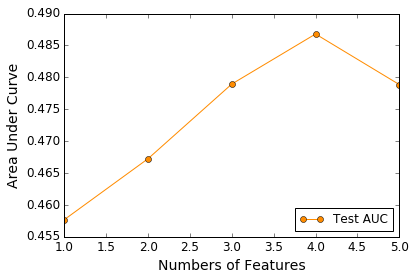

In [196]:
plt.plot(range(1,6),list(avg_test_auc), 'darkorange', label ="Test AUC",marker='o')
plt.xlabel('Numbers of Features')
plt.ylabel('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [197]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
feature_selector=SelectKBest(k=4)
feature_selector.fit(XX_scaled_prematch,YY)
X_train_subset=feature_selector.transform(XX_scaled_prematch)
clf = LogisticRegression()
clf.fit(X_train_subset, YY)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [199]:
## testing

dec_stat=clf.predict_proba(feature_selector.transform(X_TEST_prematch))[:,1]
fpr, tpr, _ = roc_curve(Y_TEST,dec_stat,pos_label=1)
roc_auc = auc(fpr, tpr)

roc_auc

0.49502307185234018

## Gradient Boosting

Full Match

In [26]:

from numpy import loadtxt

In [27]:
n_estimators = [100, 200, 300, 400, 500]
learning_rate = [0.0001, 0.001, 0.01, 0.1]

In [28]:
# import evaluation metrics
from sklearn.metrics import roc_curve, auc
# import the cross-validation structure
from sklearn.model_selection import StratifiedKFold, train_test_split

In [16]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import GradientBoostingClassifier #For Classification
from sklearn.ensemble import GradientBoostingRegressor #For Regression


skf = StratifiedKFold(n_splits=5)
cv_training_auc =[]
cv_test_auc =[] 

## cross_validation

n_estimators = [100, 200, 300, 400, 500]
learning_rate = [0.0001, 0.001, 0.01, 0.1]
max_depth =range(1,10)

for train_index, test_index in skf.split(XX_scaled,YY):
    X_train, X_test = XX_scaled[train_index], XX_scaled[test_index]
    y_train, y_test = YY[train_index], YY[test_index]
    training_auc_1 = []
    test_auc_1 = []
    for n in n_estimators:
        training_auc_estimators = []
        test_auc_estimators = []
        for r in learning_rate:
            training_auc_learning = []
            test_auc_learning = []
            for m in max_depth:
                ## fitting
                clf = GradientBoostingClassifier(n_estimators=n, learning_rate=r, max_depth=m)
                clf.fit(X_train, y_train)
                ## training
                dec_stat=clf.decision_function(X_train)
                fpr, tpr, _ = roc_curve(y_train,dec_stat,pos_label=1)
                roc_auc = auc(fpr, tpr)
                training_auc_learning.append(roc_auc)
                
                ## testing
                dec_stat=clf.decision_function(X_test)
                fpr, tpr, _ = roc_curve(y_test,dec_stat,pos_label=1)
                roc_auc = auc(fpr, tpr)
                test_auc_learning.append(roc_auc)
                
                training_auc_estimators.append(training_auc_learning)
                test_auc_estimators.append(test_auc_learning)
                training_auc_1.append(training_auc_estimators)
                test_auc_1.append(test_auc_estimators)
cv_training_auc.append(training_auc_1)
cv_test_auc.append(test_auc_1)

1

In [20]:
avg_test_auc=np.mean(cv_test_auc,axis=0)

In [21]:
avg_test_auc_estimator=np.mean(avg_test_auc,axis=2)

In [22]:
avg_test_auc_n=np.mean(avg_test_auc_estimator,axis=1)

In [23]:
unique_rows = np.unique(avg_test_auc_n)

In [24]:
unique_rows ##n_estimators=500

array([ 0.99124721,  0.99160958,  0.99189631,  0.99201439,  0.99226708])

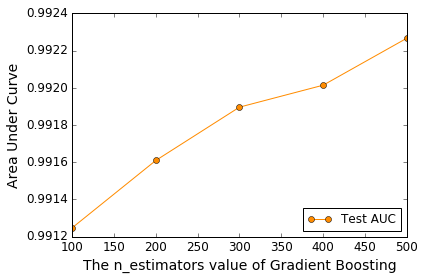

In [25]:
plt.plot([100, 200, 300, 400, 500],list(unique_rows), 'darkorange', label ="Test AUC",marker='o')

plt.xlabel('The n_estimators value of Gradient Boosting')
plt.ylabel('Area Under Curve')
plt.legend(loc="lower right")
plt.show()


In [26]:
avg_test_auc=np.mean(cv_test_auc,axis=1)
avg_test_auc_learn=np.mean(avg_test_auc,axis=2)
avg_test_auc_n=np.mean(avg_test_auc_learn,axis=0)

In [27]:
unique_rows = np.unique(avg_test_auc_n)

In [28]:
unique_rows  ##learning_rate=0.1

array([ 0.98738632,  0.98811219,  0.99227053,  0.99945861])

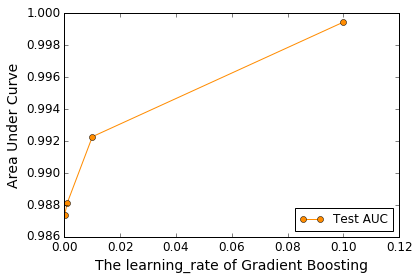

In [29]:

plt.plot([0.0001, 0.001, 0.01, 0.1],list(unique_rows), 'darkorange', label ="Test AUC",marker='o')

plt.xlabel('The learning_rate of Gradient Boosting')
plt.ylabel('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [30]:
avg_test_auc=np.mean(cv_test_auc,axis=0)
avg_test_auc_m=np.mean(avg_test_auc,axis=1)
avg_test_auc_n=np.mean(avg_test_auc_m,axis=0)

In [31]:
avg_test_auc_n  #max_depth=2

array([ 0.99142241,  0.99848908,  0.99357713,  0.99353841,  0.99248336,
        0.9908322 ,  0.98943255,  0.98823572,  0.98825136])

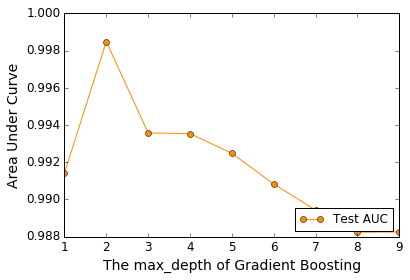

In [35]:
plt.plot(range(1,10),list(avg_test_auc_n), 'darkorange', label ="Test AUC",marker='o')

plt.xlabel('The max_depth of Gradient Boosting')
plt.ylabel('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

The cross-validation results show that n_estimator=500, learning_rate=0.1 and max_depth=2


In [29]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest


clf = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, max_depth=2)
clf.fit(XX_scaled, YY)

## testing
dec_stat=clf.decision_function(X_TEST_scaled)
fpr, tpr, _ = roc_curve(Y_TEST,dec_stat,pos_label=1)
roc_auc = auc(fpr, tpr)

In [59]:
roc_auc 

0.99947264337508224

First 10 minutes

In [75]:
XX_10=XX[:,list(range(0,20))+list(range(58,63))]
X_TEST_10=X_TEST[:,list(range(0,20))+list(range(58,63))]

In [76]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
X_scaler=StandardScaler()
X_scaler.fit(XX_10)
XX_scaled_10=X_scaler.transform(XX_10)   
X_TEST_scaled_10=X_scaler.transform(X_TEST_10)

In [77]:
skf = StratifiedKFold(n_splits=5)
cv_training_auc =[]
cv_test_auc =[] 

## cross_validation

n_estimators = [100, 200, 300, 400, 500]
learning_rate = [0.0001, 0.001, 0.01, 0.1]
max_depth =range(1,10)

for train_index, test_index in skf.split(XX_scaled_10,YY):
    X_train, X_test = XX_scaled_10[train_index], XX_scaled_10[test_index]
    y_train, y_test = YY[train_index], YY[test_index]
    training_auc_1 = []
    test_auc_1 = []
    for n in n_estimators:
        training_auc_estimators = []
        test_auc_estimators = []
        for r in learning_rate:
            training_auc_learning = []
            test_auc_learning = []
            for m in max_depth:
                ## fitting
                clf = GradientBoostingClassifier(n_estimators=n, learning_rate=r, max_depth=m)
                clf.fit(X_train, y_train)
                ## training
                dec_stat=clf.decision_function(X_train)
                fpr, tpr, _ = roc_curve(y_train,dec_stat,pos_label=1)
                roc_auc = auc(fpr, tpr)
                training_auc_learning.append(roc_auc)
                
                ## testing
                dec_stat=clf.decision_function(X_test)
                fpr, tpr, _ = roc_curve(y_test,dec_stat,pos_label=1)
                roc_auc = auc(fpr, tpr)
                test_auc_learning.append(roc_auc)
                
                training_auc_estimators.append(training_auc_learning)
                test_auc_estimators.append(test_auc_learning)
                training_auc_1.append(training_auc_estimators)
                test_auc_1.append(test_auc_estimators)
cv_training_auc.append(training_auc_1)
cv_test_auc.append(test_auc_1)

In [78]:
avg_test_auc=np.mean(cv_test_auc,axis=0)

avg_test_auc_estimator=np.mean(avg_test_auc,axis=2)

avg_test_auc_n=np.mean(avg_test_auc_estimator,axis=1)

unique_rows = np.unique(avg_test_auc_n)

In [79]:
unique_rows  ##n_estimators=500

array([ 0.77418886,  0.77763876,  0.77988119,  0.78022404,  0.78141598])

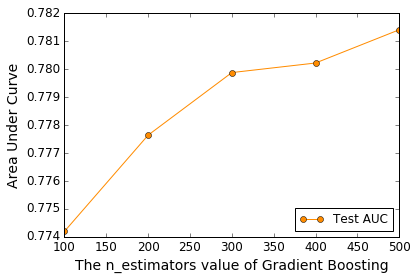

In [80]:
plt.plot([100, 200, 300, 400, 500],list(unique_rows), 'darkorange', label ="Test AUC",marker='o')
plt.xlabel('The n_estimators value of Gradient Boosting')
plt.ylabel('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [46]:
avg_test_auc=np.mean(cv_test_auc,axis=1)
avg_test_auc_learn=np.mean(avg_test_auc,axis=2)
avg_test_auc_n=np.mean(avg_test_auc_learn,axis=0)

In [47]:
unique_rows = np.unique(avg_test_auc_n)

In [48]:
unique_rows  ##learning_rate=0.1

array([ 0.74861087,  0.77794871,  0.78883055,  0.79866141])

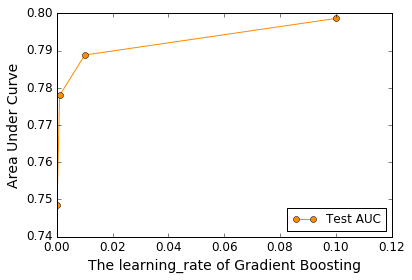

In [49]:
plt.plot([0.0001, 0.001, 0.01, 0.1],list(unique_rows), 'darkorange', label ="Test AUC",marker='o')
plt.xlabel('The learning_rate of Gradient Boosting')
plt.ylabel('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [51]:
avg_test_auc=np.mean(cv_test_auc,axis=0)
avg_test_auc_m=np.mean(avg_test_auc,axis=1)
avg_test_auc_n=np.mean(avg_test_auc_m,axis=0)

In [52]:
avg_test_auc_n  ##max_depth=3

array([ 0.78266253,  0.78660173,  0.78868209,  0.7874968 ,  0.78426959,
        0.78008322,  0.77069313,  0.76674521,  0.75938163])

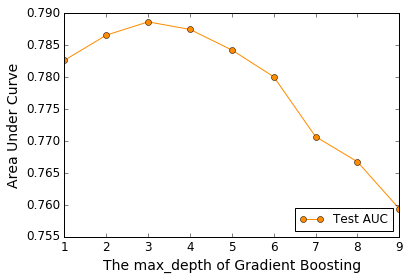

In [53]:
plt.plot(range(1,10),list(avg_test_auc_n), 'darkorange', label ="Test AUC",marker='o')

plt.xlabel('The max_depth of Gradient Boosting')
plt.ylabel('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

The cross-validation results show that n_estimator=500, learning_rate=0.1 and max_depth=3

In [60]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest


clf = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, max_depth=3)
clf.fit(XX_scaled_10, YY)

## testing
dec_stat=clf.decision_function(X_TEST_scaled_10)
fpr, tpr, _ = roc_curve(Y_TEST,dec_stat,pos_label=1)
roc_auc = auc(fpr, tpr)

In [61]:
roc_auc

0.74891232696110743

Pre-match

In [69]:
XX_prematch=XX[:,58:63]
X_TEST_prematch=X_TEST[:,58:63]

In [70]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
X_scaler=StandardScaler()
X_scaler.fit(XX_prematch)
XX_scaled_prematch=X_scaler.transform(XX_prematch)   
X_TEST_scaled_prematch=X_scaler.transform(X_TEST_prematch)

In [83]:
skf = StratifiedKFold(n_splits=5)
cv_training_auc =[]
cv_test_auc =[] 

## cross_validation

n_estimators = [100, 200, 300, 400, 500]
learning_rate = [0.0001, 0.001, 0.01, 0.1]
max_depth =range(1,10)

for train_index, test_index in skf.split(XX_scaled_prematch,YY):
    X_train, X_test = XX_scaled_prematch[train_index], XX_scaled_prematch[test_index]
    y_train, y_test = YY[train_index], YY[test_index]
    training_auc_1 = []
    test_auc_1 = []
    for n in n_estimators:
        training_auc_estimators = []
        test_auc_estimators = []
        for r in learning_rate:
            training_auc_learning = []
            test_auc_learning = []
            for m in max_depth:
                ## fitting
                clf = GradientBoostingClassifier(n_estimators=n, learning_rate=r, max_depth=m)
                clf.fit(X_train, y_train)
                ## training
                dec_stat=clf.decision_function(X_train)
                fpr, tpr, _ = roc_curve(y_train,dec_stat,pos_label=1)
                roc_auc = auc(fpr, tpr)
                training_auc_learning.append(roc_auc)
                
                ## testing
                dec_stat=clf.decision_function(X_test)
                fpr, tpr, _ = roc_curve(y_test,dec_stat,pos_label=1)
                roc_auc = auc(fpr, tpr)
                test_auc_learning.append(roc_auc)
                
                training_auc_estimators.append(training_auc_learning)
                test_auc_estimators.append(test_auc_learning)
                training_auc_1.append(training_auc_estimators)
                test_auc_1.append(test_auc_estimators)
cv_training_auc.append(training_auc_1)
cv_test_auc.append(test_auc_1)

In [84]:
avg_test_auc=np.mean(cv_test_auc,axis=0)
avg_test_auc_estimator=np.mean(avg_test_auc,axis=2)
avg_test_auc_n=np.mean(avg_test_auc_estimator,axis=1)
unique_rows = np.unique(avg_test_auc_n)
unique_rows  ##n_estimators=500

array([ 0.53216578,  0.53531014,  0.53620766,  0.53635067,  0.5369643 ])

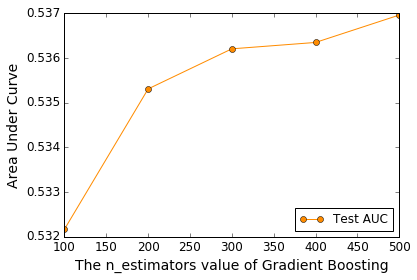

In [85]:
plt.plot([100, 200, 300, 400, 500],list(unique_rows), 'darkorange', label ="Test AUC",marker='o')
plt.xlabel('The n_estimators value of Gradient Boosting')
plt.ylabel('Area Under Curve')
plt.legend(loc="lower right")
plt.show()


In [86]:
avg_test_auc=np.mean(cv_test_auc,axis=1)
avg_test_auc_learn=np.mean(avg_test_auc,axis=2)
avg_test_auc_n=np.mean(avg_test_auc_learn,axis=0)

unique_rows = np.unique(avg_test_auc_n)

unique_rows  ##learning_rate=0.1

array([ 0.5194925 ,  0.52730664,  0.5437752 ,  0.55102448])

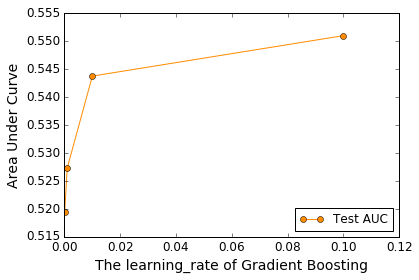

In [87]:
plt.plot([0.0001, 0.001, 0.01, 0.1],list(unique_rows), 'darkorange', label ="Test AUC",marker='o')
plt.xlabel('The learning_rate of Gradient Boosting')
plt.ylabel('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [88]:
avg_test_auc=np.mean(cv_test_auc,axis=0)
avg_test_auc_m=np.mean(avg_test_auc,axis=1)
avg_test_auc_n=np.mean(avg_test_auc_m,axis=0)

avg_test_auc_n  ##max_depth=9

array([ 0.51290061,  0.51759387,  0.53130109,  0.53616381,  0.5273165 ,
        0.53334607,  0.54492524,  0.55611033,  0.55893987])

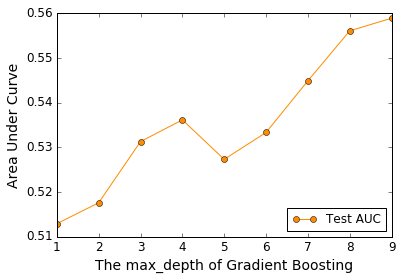

In [89]:
plt.plot(range(1,10),list(avg_test_auc_n), 'darkorange', label ="Test AUC",marker='o')
plt.xlabel('The max_depth of Gradient Boosting')
plt.ylabel('Area Under Curve')
plt.legend(loc="lower right")
plt.show()


The cross-validation results show that n_estimator=500, learning_rate=0.1 and max_depth=9

In [71]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest


clf = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, max_depth=3)
clf.fit(XX_scaled_prematch, YY)

## testing
dec_stat=clf.decision_function(X_TEST_scaled_prematch)
fpr, tpr, _ = roc_curve(Y_TEST,dec_stat,pos_label=1)
roc_auc = auc(fpr, tpr)

In [72]:
roc_auc

0.61217864205669092

## XgBoost

Reference: https://machinelearningmastery.com/evaluate-gradient-boosting-models-xgboost-python/

In [96]:
!pip install xgboost


    100% |████████████████████████████████| 501kB 2.2MB/s 
  Running setup.py bdist_wheel for xgboost ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done
  Stored in directory: /home/jovyan/.cache/pip/wheels/4e/6d/1d/0bc23240225fe411315d8abb5d4521b9ff002493ff77515ccc
Successfully built xgboost
You are using pip version 8.1.2, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


Full Match

In [44]:
import xgboost as xgb

In [64]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


skf = StratifiedKFold(n_splits=5)
cv_training_auc =[]
cv_test_auc =[] 

## cross_validation

n_estimators = [100, 200, 300, 400, 500]
learning_rate = [0.0001, 0.001, 0.01, 0.1]
max_depth =range(1,10)

for train_index, test_index in skf.split(XX_scaled,YY):
    X_train, X_test = XX_scaled[train_index], XX_scaled[test_index]
    y_train, y_test = YY[train_index], YY[test_index]
    training_auc_1 = []
    test_auc_1 = []
    for n in n_estimators:
        training_auc_estimators = []
        test_auc_estimators = []
        for r in learning_rate:
            training_auc_learning = []
            test_auc_learning = []
            for m in max_depth:
                ## fitting
                clf=XGBClassifier(max_depth=m, learning_rate=r, n_estimators=n)
                clf.fit(X_train,y_train)
                y_pred = clf.predict(X_train)
                dec_stat = accuracy_score(y_train,y_pred)
                training_auc_learning.append(dec_stat)
                
                ## testing
                y_pred = clf.predict(X_test)
                dec_stat = accuracy_score(y_test,y_pred)
                test_auc_learning.append(dec_stat)
                
                training_auc_estimators.append(training_auc_learning)
                test_auc_estimators.append(test_auc_learning)
                training_auc_1.append(training_auc_estimators)
                test_auc_1.append(test_auc_estimators)
cv_training_auc.append(training_auc_1)
cv_test_auc.append(test_auc_1)

In [89]:
avg_test_auc=np.mean(cv_test_auc,axis=0)
avg_test_auc_estimator=np.mean(avg_test_auc,axis=2)
avg_test_auc_n=np.mean(avg_test_auc_estimator,axis=1)
unique_rows = np.unique(avg_test_auc_n)

In [90]:
unique_rows  ##learning_rate=0.1

array([ 0.98907466,  0.98942852,  0.99031316,  0.99044586])

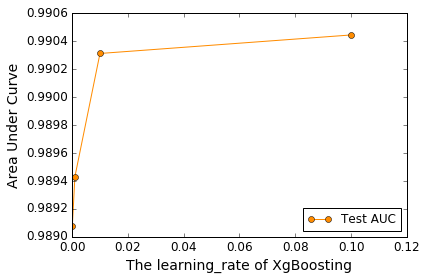

In [92]:
plt.plot([0.0001, 0.001, 0.01, 0.1],list(unique_rows), 'darkorange', label ="Test AUC",marker='o')
plt.xlabel('The learning_rate of XgBoosting')
plt.ylabel('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [93]:
avg_test_auc=np.mean(cv_test_auc,axis=2)
avg_test_auc_learn=np.mean(avg_test_auc,axis=2)
avg_test_auc_n=np.mean(avg_test_auc_learn,axis=0)
unique_rows = np.unique(avg_test_auc_n)

In [94]:
unique_rows  ##n_estimator=500

array([ 0.98907466,  0.98942852,  0.99031316,  0.99031316,  0.99044586])

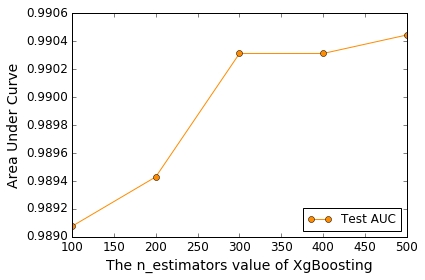

In [117]:
plt.plot([100, 200, 300, 400, 500],list(unique_rows), 'darkorange', label ="Test AUC",marker='o')
plt.xlabel('The n_estimators value of XgBoosting')
plt.ylabel('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [101]:
avg_test_auc=np.mean(cv_test_auc,axis=0)
avg_test_auc_m=np.mean(avg_test_auc,axis=1)
avg_test_auc_n=np.mean(avg_test_auc_m,axis=0)
unique_rows = np.unique(avg_test_auc_n)

In [102]:
unique_rows   ###max_depth=9

array([ 0.98686306,  0.98765924,  0.99020701,  0.99044586,  0.9906051 ,
        0.9906051 ,  0.99076433,  0.99092357,  0.99116242])

In [158]:
unique_rows=np.asarray([ 0.98686306,  0.98765924,  0.99020701,  0.99044586,  0.9906051 ,
        0.9906051 ,  0.99076433,  0.99092357,  0.99116242])

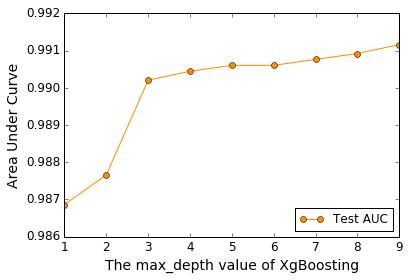

In [160]:
plt.plot(range(1,10),list(unique_rows), 'darkorange', label ="Test AUC",marker='o')
plt.xlabel('The max_depth value of XgBoosting')
plt.ylabel('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
###fitting the model 

In [105]:
clf=XGBClassifier(max_depth=9, learning_rate=0.1, n_estimators=500)
clf.fit(XX_scaled,YY)
y_pred = clf.predict(X_TEST)
dec_stat = accuracy_score(Y_TEST,y_pred)

In [106]:
dec_stat

0.97994269340974216

First 10 minutes

In [107]:
XX_10=XX[:,list(range(0,20))+list(range(58,63))]
X_TEST_10=X_TEST[:,list(range(0,20))+list(range(58,63))]
XX_10=XX[:,list(range(0,20))+list(range(58,63))]
X_TEST_10=X_TEST[:,list(range(0,20))+list(range(58,63))]

from sklearn.preprocessing import StandardScaler,MinMaxScaler
X_scaler=StandardScaler()
X_scaler.fit(XX_10)
XX_scaled_10=X_scaler.transform(XX_10)   
X_TEST_scaled_10=X_scaler.transform(X_TEST_10)

In [108]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


skf = StratifiedKFold(n_splits=5)
cv_training_auc =[]
cv_test_auc =[] 

## cross_validation

n_estimators = [100, 200, 300, 400, 500]
learning_rate = [0.0001, 0.001, 0.01, 0.1]
max_depth =range(1,10)

for train_index, test_index in skf.split(XX_scaled_10,YY):
    X_train, X_test = XX_scaled_10[train_index], XX_scaled_10[test_index]
    y_train, y_test = YY[train_index], YY[test_index]
    training_auc_1 = []
    test_auc_1 = []
    for n in n_estimators:
        training_auc_estimators = []
        test_auc_estimators = []
        for r in learning_rate:
            training_auc_learning = []
            test_auc_learning = []
            for m in max_depth:
                ## fitting
                clf=XGBClassifier(max_depth=m, learning_rate=r, n_estimators=n)
                clf.fit(X_train,y_train)
                y_pred = clf.predict(X_train)
                dec_stat = accuracy_score(y_train,y_pred)
                training_auc_learning.append(dec_stat)
                
                ## testing
                y_pred = clf.predict(X_test)
                dec_stat = accuracy_score(y_test,y_pred)
                test_auc_learning.append(dec_stat)
                
                training_auc_estimators.append(training_auc_learning)
                test_auc_estimators.append(test_auc_learning)
                training_auc_1.append(training_auc_estimators)
                test_auc_1.append(test_auc_estimators)
cv_training_auc.append(training_auc_1)
cv_test_auc.append(test_auc_1)

In [118]:
avg_test_auc=np.mean(cv_test_auc,axis=0)
avg_test_auc_estimator=np.mean(avg_test_auc,axis=2)
avg_test_auc_n=np.mean(avg_test_auc_estimator,axis=1)
unique_rows = np.unique(avg_test_auc_n)

In [119]:
unique_rows  ##n_estimator=500

array([ 0.69882343,  0.70382166,  0.70430821,  0.70501592,  0.70559094])

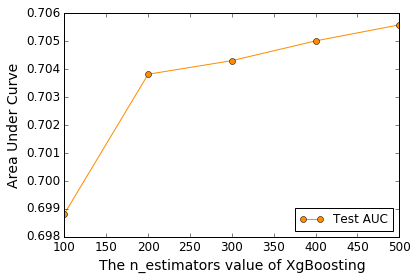

In [120]:
plt.plot([100, 200, 300, 400, 500],list(unique_rows), 'darkorange', label ="Test AUC",marker='o')
plt.xlabel('The n_estimators value of XgBoosting')
plt.ylabel('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [121]:
avg_test_auc=np.mean(cv_test_auc,axis=0)
avg_test_auc_m=np.mean(avg_test_auc,axis=1)
avg_test_auc_n=np.mean(avg_test_auc_m,axis=0)
unique_rows = np.unique(avg_test_auc_n)

In [122]:
unique_rows ###max_depth=9

array([ 0.68463376,  0.69036624,  0.69888535,  0.70788217,  0.70820064,
        0.70883758,  0.7089172 ,  0.71122611,  0.71265924])

In [156]:
unique_rows=np.asarray([ 0.68463376,  0.69036624,  0.69888535,  0.70788217,  0.70820064,
        0.70883758,  0.7089172 ,  0.71122611,  0.71265924])

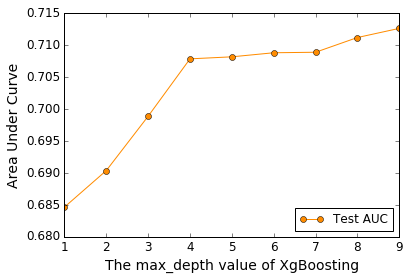

In [157]:
plt.plot(range(1,10),list(unique_rows), 'darkorange', label ="Test AUC",marker='o')
plt.xlabel('The max_depth value of XgBoosting')
plt.ylabel('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [134]:
avg_test_auc=np.mean(cv_test_auc,axis=0)
avg_test_auc_estimator=np.mean(avg_test_auc,axis=0)
avg_test_auc_n=np.mean(avg_test_auc_estimator,axis=1)
unique_rows = np.unique(avg_test_auc_n)

In [136]:
unique_rows  ##learning_rate=0.1

array([ 0.67841472,  0.70682944,  0.70951875,  0.71928521])

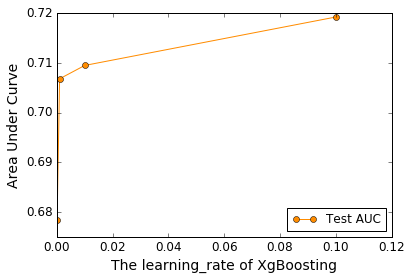

In [137]:
plt.plot([0.0001, 0.001, 0.01, 0.1],list(unique_rows), 'darkorange', label ="Test AUC",marker='o')
plt.xlabel('The learning_rate of XgBoosting')
plt.ylabel('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [146]:
###fitting the model 

clf=XGBClassifier(max_depth=9, learning_rate=0.1, n_estimators=500)
clf.fit(XX_scaled_10,YY)
y_pred = clf.predict(X_TEST_10)
dec_stat = accuracy_score(Y_TEST,y_pred)

dec_stat

0.65329512893982811

Prematch

In [147]:
XX_prematch=XX[:,58:63]
X_TEST_prematch=X_TEST[:,58:63]

In [148]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
X_scaler=StandardScaler()
X_scaler.fit(XX_prematch)
XX_scaled_prematch=X_scaler.transform(XX_prematch)   
X_TEST_scaled_prematch=X_scaler.transform(X_TEST_prematch)

skf = StratifiedKFold(n_splits=5)
cv_training_auc =[]
cv_test_auc =[] 

In [149]:

## cross_validation

n_estimators = [100, 200, 300, 400, 500]
learning_rate = [0.0001, 0.001, 0.01, 0.1]
max_depth =range(1,10)

for train_index, test_index in skf.split(XX_scaled_prematch,YY):
    X_train, X_test = XX_scaled_prematch[train_index], XX_scaled_prematch[test_index]
    y_train, y_test = YY[train_index], YY[test_index]
    training_auc_1 = []
    test_auc_1 = []
    for n in n_estimators:
        training_auc_estimators = []
        test_auc_estimators = []
        for r in learning_rate:
            training_auc_learning = []
            test_auc_learning = []
            for m in max_depth:
                ## fitting
                clf=XGBClassifier(max_depth=m, learning_rate=r, n_estimators=n)
                clf.fit(X_train,y_train)
                y_pred = clf.predict(X_train)
                dec_stat = accuracy_score(y_train,y_pred)
                training_auc_learning.append(dec_stat)
                
                ## testing
                y_pred = clf.predict(X_test)
                dec_stat = accuracy_score(y_test,y_pred)
                test_auc_learning.append(dec_stat)
                
                
                training_auc_estimators.append(training_auc_learning)
                test_auc_estimators.append(test_auc_learning)
                training_auc_1.append(training_auc_estimators)
                test_auc_1.append(test_auc_estimators)
cv_training_auc.append(training_auc_1)
cv_test_auc.append(test_auc_1)

In [150]:
avg_test_auc=np.mean(cv_test_auc,axis=0)

avg_test_auc_estimator=np.mean(avg_test_auc,axis=2)

avg_test_auc_n=np.mean(avg_test_auc_estimator,axis=1)

unique_rows = np.unique(avg_test_auc_n)

In [151]:
unique_rows  ##n_estimator=500

array([ 0.51574664,  0.51981599,  0.52158528,  0.52229299,  0.5231334 ])

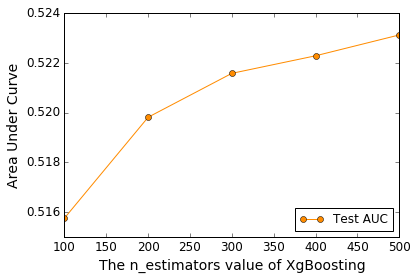

In [152]:
plt.plot([100, 200, 300, 400, 500],list(unique_rows), 'darkorange', label ="Test AUC",marker='o')
plt.xlabel('The n_estimators value of XgBoosting')
plt.ylabel('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [153]:
avg_test_auc=np.mean(cv_test_auc,axis=0)
avg_test_auc_estimator=np.mean(avg_test_auc,axis=0)
avg_test_auc_n=np.mean(avg_test_auc_estimator,axis=1)
unique_rows = np.unique(avg_test_auc_n)

In [154]:
unique_rows

array([ 0.51033263,  0.51429582,  0.52484076,  0.53259023])

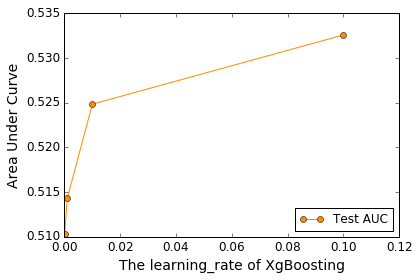

In [155]:
plt.plot([0.0001, 0.001, 0.01, 0.1],list(unique_rows), 'darkorange', label ="Test AUC",marker='o')

plt.xlabel('The learning_rate of XgBoosting')
plt.ylabel('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [161]:
avg_test_auc=np.mean(cv_test_auc,axis=2)
avg_test_auc_learn=np.mean(avg_test_auc,axis=2)
avg_test_auc_n=np.mean(avg_test_auc_learn,axis=0)

unique_rows = np.unique(avg_test_auc_n)


In [162]:
unique_rows

array([ 0.51574664,  0.51981599,  0.52158528,  0.52229299,  0.5231334 ])

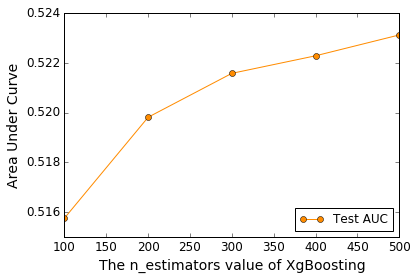

In [163]:
plt.plot([100, 200, 300, 400, 500],list(unique_rows), 'darkorange', label ="Test AUC",marker='o')
plt.xlabel('The n_estimators value of XgBoosting')
plt.ylabel('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [167]:
avg_test_auc=np.mean(cv_test_auc,axis=0)
avg_test_auc_m=np.mean(avg_test_auc,axis=1)
avg_test_auc_n=np.mean(avg_test_auc_m,axis=0)

In [168]:
unique_rows = np.unique(avg_test_auc_n)

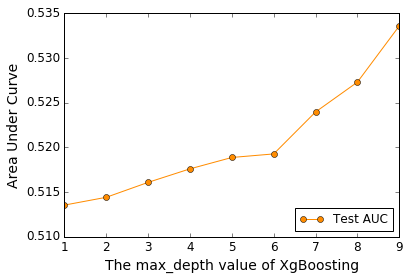

In [169]:
plt.plot(range(1,10),list(unique_rows), 'darkorange', label ="Test AUC",marker='o')
plt.xlabel('The max_depth value of XgBoosting')
plt.ylabel('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

# Changing the amount of training data on KNN

Pre-match

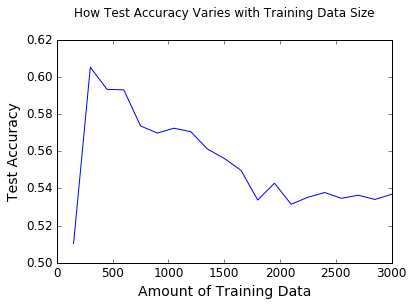

In [182]:
XX_prematch=XX[:,58:63]
X_TEST_prematch=X_TEST[:,58:63]

from sklearn.preprocessing import StandardScaler,MinMaxScaler
X_scaler=StandardScaler()
X_scaler.fit(XX_prematch)
XX_scaled_prematch=X_scaler.transform(XX_prematch)   
X_TEST_scaled_prematch=X_scaler.transform(X_TEST_prematch)

KNN_pre_accuracy=np.zeros((10,20))


for j in range(10):
    for i in range(20):
        ind=random.sample(range(0,len(XX_prematch)), 150*(i+1))
        XX_ind=XX_scaled_prematch[ind]
        YY_ind=YY[ind]
        feature_selector=SelectKBest(k='all')
        feature_selector.fit(XX_ind,YY_ind)
        X_selected=feature_selector.transform(XX_ind)#all data
        clf = KNeighborsClassifier(n_neighbors=50)
        clf.fit(X_selected, YY_ind)
        X_test=feature_selector.transform(X_TEST_scaled_prematch)
        dec_stat=clf.predict_proba(X_test)[:,0]
        fpr, tpr, _ = roc_curve(Y_TEST,dec_stat,pos_label=0)
        roc_auc = auc(fpr, tpr)
        KNN_pre_accuracy[j,i]=roc_auc


plt.figure()
plt.plot(150*(np.arange(20)+1),np.mean(KNN_pre_accuracy,axis=0))
plt.title('How Test Accuracy Varies with Training Data Size',y=1.08)
plt.ylabel('Test Accuracy')
plt.xlabel('Amount of Training Data')
plt.show()

10-minutes

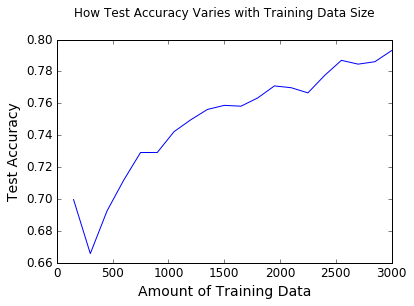

In [183]:

import numpy as np
from sklearn.metrics import roc_curve, auc
import random
#ind=random.sample(range(0,len(XX)), 300*(i+1))
KNN_10_accuracy=np.zeros((10,20))
XX_10=XX[:,list(range(0,20))+list(range(58,63))]
X_TEST_10=X_TEST[:,list(range(0,20))+list(range(58,63))]
from sklearn.preprocessing import StandardScaler
X_scaler=StandardScaler()
X_scaler.fit(XX_10)
XX_10_scaled=X_scaler.transform(XX_10)   
X_TEST_10_scaled=X_scaler.transform(X_TEST_10)

for j in range(10):
    for i in range(20):
        ind=random.sample(range(0,len(XX)), 150*(i+1))

        XX_10_ind=XX_10_scaled[ind]
        YY_ind=YY[ind]

        feature_selector=SelectKBest(k=10)
        feature_selector.fit(XX_10_ind,YY_ind)
        X_selected=feature_selector.transform(XX_10_ind)#all data
        clf = KNeighborsClassifier(n_neighbors=50)
        clf.fit(X_selected, YY_ind)

        X_test=feature_selector.transform(X_TEST_10_scaled)

        dec_stat=clf.predict_proba(X_test)[:,0]
        fpr, tpr, _ = roc_curve(Y_TEST,dec_stat,pos_label=0)
        roc_auc = auc(fpr, tpr)
        KNN_10_accuracy[j,i]=roc_auc
for j in range(10):
    for i in range(20):
        ind=random.sample(range(0,len(XX)), 150*(i+1))
        XX_10_ind=XX_10_scaled[ind]
        YY_ind=YY[ind]
        feature_selector=SelectKBest(k=10)
        feature_selector.fit(XX_10_ind,YY_ind)
        X_selected=feature_selector.transform(XX_10_ind)#all data
        clf = KNeighborsClassifier(n_neighbors=50)
        clf.fit(X_selected, YY_ind)
        X_test=feature_selector.transform(X_TEST_10_scaled)
        dec_stat=clf.predict_proba(X_test)[:,0]
        fpr, tpr, _ = roc_curve(Y_TEST,dec_stat,pos_label=0)
        roc_auc = auc(fpr, tpr)
        KNN_10_accuracy[j,i]=roc_auc

plt.figure()
plt.plot(150*(np.arange(20)+1),np.mean(KNN_10_accuracy,axis=0))
plt.title('How Test Accuracy Varies with Training Data Size',y=1.08)
plt.ylabel('Test Accuracy')
plt.xlabel('Amount of Training Data')
plt.show()

Full Match

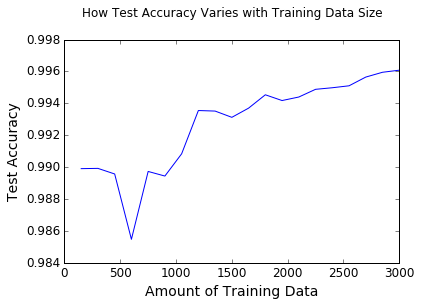

In [184]:
KNN_accuracy=np.zeros((10,20))
XX=XX
X_TEST=X_TEST

from sklearn.preprocessing import StandardScaler
X_scaler=StandardScaler()
X_scaler.fit(XX)
XX_scaled=X_scaler.transform(XX)   
X_TEST_scaled=X_scaler.transform(X_TEST)

for j in range(10):
    for i in range(20):
        ind=random.sample(range(0,len(XX)), 150*(i+1))
        XX_ind=XX_scaled[ind]
        YY_ind=YY[ind]
        feature_selector=SelectKBest(k=10)
        feature_selector.fit(XX_ind,YY_ind)
        X_selected=feature_selector.transform(XX_ind)#all data
        clf = KNeighborsClassifier(n_neighbors=50)
        clf.fit(X_selected, YY_ind)
        X_test=feature_selector.transform(X_TEST_scaled)
        dec_stat=clf.predict_proba(X_test)[:,0]
        fpr, tpr, _ = roc_curve(Y_TEST,dec_stat,pos_label=0)
        roc_auc = auc(fpr, tpr)
        KNN_accuracy[j,i]=roc_auc

plt.figure()
plt.plot(150*(np.arange(20)+1),np.mean(KNN_accuracy,axis=0))
plt.title('How Test Accuracy Varies with Training Data Size',y=1.08)
plt.ylabel('Test Accuracy')
plt.xlabel('Amount of Training Data')
plt.show()

